In [1]:
import numpy as np
from pydpmd.data import RigidBumpy, load
from pydpmd.plot import draw_particles_frame, create_animation, downsample
from correlation_functions import compute_msd, compute_shear_modulus, compute_rotational_msd, compute_pair_correlation_function
from pydpmd.calc import run_binned, fused_msd_kernel, TimeBins, LagBinsExact, LagBinsLog, LagBinsLinear, LagBinsPseudoLog, requires_fields
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import os
import re
from tqdm import tqdm

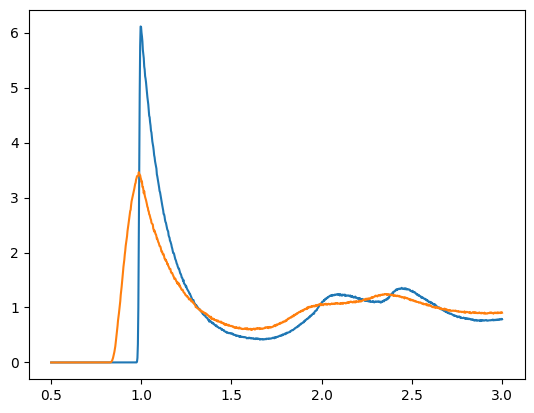

In [21]:
root = '/home/mmccraw/dev/data/09-27-25/run-1/'
R = re.compile(rf'^dynamics_(\d+)$')
ds = [d for d in os.listdir(root) if os.path.isdir(os.path.join(root,d)) and R.fullmatch(d)]
run_names = [os.path.join(root,d) for d in sorted(ds,key=lambda s:int(R.fullmatch(s).group(1)))]

for run_name in run_names:
    try:
        data = load(run_name, location=['final', 'init'], load_trajectory=True, load_full=False)
    except:
        continue
    msd_path = os.path.join(run_name, 'msd.npz')
    msd, t = compute_rotational_msd(data, msd_path, overwrite=False)
    shear_modulus_path = os.path.join(run_name, 'shear_modulus.npz')
    shear_modulus, t = compute_shear_modulus(data, shear_modulus_path, overwrite=False, subtract_mean_stress=True)
    pair_correlation_function_path = os.path.join(run_name, 'pair_correlation_function.npz')
    radial_bins = np.linspace(0.5, 3, 1000)
    G, r = compute_pair_correlation_function(data, radial_bins, pair_correlation_function_path, overwrite=False)

    pressure = np.mean([data.trajectory[i].pressure for i in range(data.trajectory.num_frames())], axis=0)
    te = np.array([data.trajectory[i].pe_total + data.trajectory[i].ke_total for i in range(data.trajectory.num_frames())])
    te_fluc = np.std(te, axis=0) / np.mean(te, axis=0)
    phi = data.packing_fraction

    cmap = plt.cm.viridis
    norm = plt.Normalize(vmin=0, vmax=len(phi))

    plt.plot(r, G[1, 0])
    plt.plot(r, G[21, 0])
    break

#     for i in range(len(phi)):
#         plt.scatter(phi[i], te_fluc[i], c=cmap(norm(i)))
# plt.yscale('log')

#     for i in range(len(phi)):
#         plt.scatter(phi[i], pressure[i], c=cmap(norm(i)))
# plt.yscale('log')

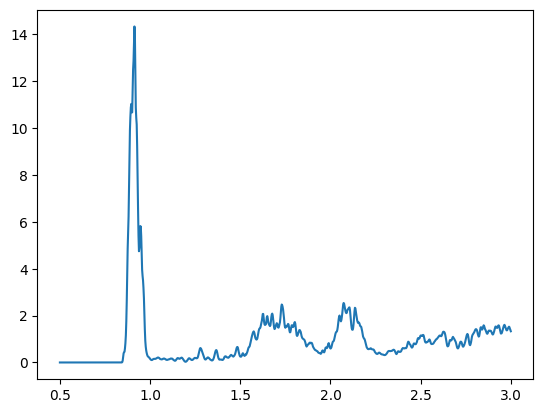

In [5]:
plt.plot(r, G[0, 0])

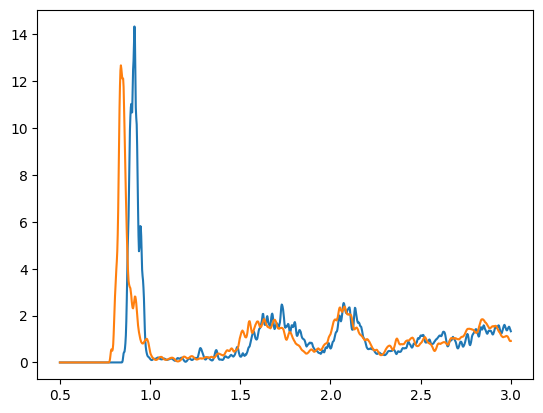

In [17]:
plt.plot(r, G[0, 0])
plt.plot(r, G[10, 0])